# Packages

In [2]:
import numpy as np
import mpmath as mp #for polylog
from scipy.interpolate import interp1d
from scipy.integrate import odeint #to solve differnential equations
import scipy.integrate as integrate #for (numerical) integrating
import itertools #to merge lists
import time #for printing out timing
import matplotlib.pyplot as pl #for plots
from matplotlib import rc, rcParams

# Options for plotting

In [25]:
fontsize=26
legendfontsize=22
font = {'size' : fontsize}
rc('font',**font)
rc('text', usetex=True)
rc('font', family='serif', serif='Computer Modern Roman')

In [26]:
#Color palette accessible to colorblind people (see https://davidmathlogic.com/colorblind/)
lightblue='#1A85FF'
blue='#005AB5'
darkblue='#222255' #'#002E5D' #'#003A74' # #'#222255'
purple='#5D3A9B'
magenta='#AA4499'
darkmagenta='#8D2015' #'#882255'
pink='#CC6677' #'#CC79A7'
red='#DC3220'
orange='#E66100'
orangeSophia='#ff7f00'
yellow='#FFC20A'
green='#40B0A6'

colors=[lightblue,blue,darkblue,purple,magenta,darkmagenta,pink,red,orange,yellow,green]

In [27]:
goldenratio=1.61803398875 #Standard Python ratio for plot width/height=8/6.

# Grid

In [159]:
#_____Initial grid of ri values (from r1=rmin to rN=rmax)_____
###See Nishikawa et al., 1901.00499, p.5
N=400 #400 points from n=1 (i=0) to n=400 (i=399); i=Python indices starting from 0.
[rmin,rmax]=[10.**(-2.),10.**(2.)] #[rmin,rmax]=[r1,rN]
rivals=np.logspace(np.log10(rmin),np.log10(rmax),N)
#print(rivals)
print(len(rivals))

#_____Grid with inner boundary shell r0=0_____
r0=0. #Inner boundary shell
r0rivals=np.append(r0,rivals) #Append r0=0 for efficient calculation of differences
#print(r0rivals)
print(len(r0rivals))

#_____Grid of midpoints of i-th shell, rmidpoint=r_{i}+r{i-1}/2 _____
rmidpoints=np.array([(r0rivals[i]+r0rivals[i-1])/2. for i in range(1,len(r0rivals))]) #1<=i<=N. i=0 not allowed. Range stops before len(r0rivals)=N+1, i.e. last point here is len(r0rivals)-1=N.
#print(rmidpoints)
print(len(rmidpoints))

400
401
400


# Initial conditions: NFW profile

In [172]:
#_____Dimensionless NFW profile_____
def rhoNFW(r):
    return 1./(r*(1+r)**2.)

def MNFW(r):
    return np.log(1.+r)-r/(r+1.)

def pNFW(r):
    return (np.pi**2.-(1.+r*(9.+7.*r))/(r*(1.+r)**2.)-np.log(r)+np.log(1.+r)*(1.+r**(-2.)-4./r-2./(1.+r)+3.*np.log(1.+r))+6.*float(mp.polylog(2.,-r)))/2.

def vNFW(r):
    return np.sqrt(pNFW(r)/rhoNFW(r))

for r in [100]:
    print([rhoNFW(r),MNFW(r),pNFW(r),vNFW(r)])

[9.80296049406921e-07, 3.6250215069402696, 9.526694100259192e-09, 0.09858083308470467]


In [21]:
def pNFWnum(r):
    def integrand(r):
        return (rhoNFW(r)*MNFW(r))/r**2.
    pNFWnum=integrate.quad(integrand,r,rmax)[0]
    return pNFWnum

## Initial extensive variable Mi defined at ri

In [167]:
Minivals=MNFW(r0rivals)
#print(Minivals)
print(len(Minivals))

401


## Initial intensive variables rhoi,pi,vi defined at midpoint of i-th shell, rmidpoint=r_{i}+r{i-1}/2

In [184]:
rhoinivals=rhoNFW(rmidpoints)
#print(rhoinivals)
print(len(rhoinivals))

pinivals=np.array([pNFW(r) for r in rmidpoints]) #Need np.array here because mp.math cannot handle input of np.arrays in function.
#print(pinivals)
print(len(pinivals))

vinivals=np.array([vNFW(r) for r in rmidpoints])
#print(vinivals)
print(len(vinivals))

400
400
400


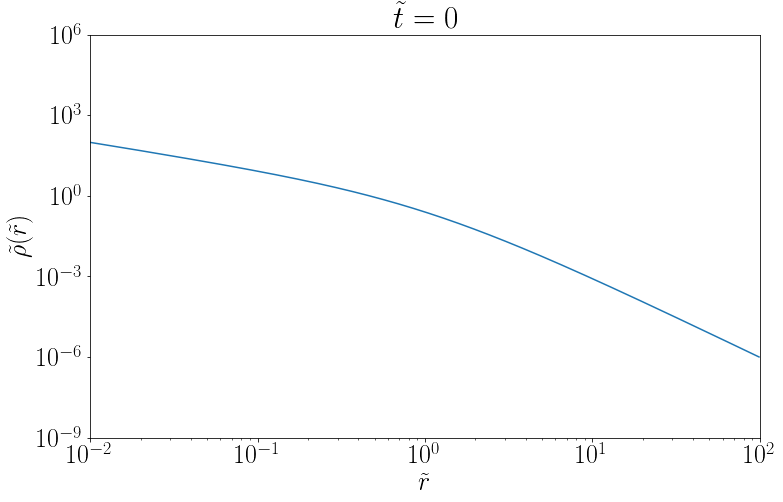

In [179]:
pl.figure(figsize=(12,12/goldenratio))
pl.plot(rmidpoints,rhoinivals)
pl.xlim([rmin,rmax])
pl.ylim([10.**(-9.),10.**6.])
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\tilde{r}$',fontsize=fontsize)
pl.ylabel(r'$\tilde{\rho}(\tilde{r})$',fontsize=fontsize)
pl.title(r'$\tilde{t}=0$')
pl.show()
###Ok.

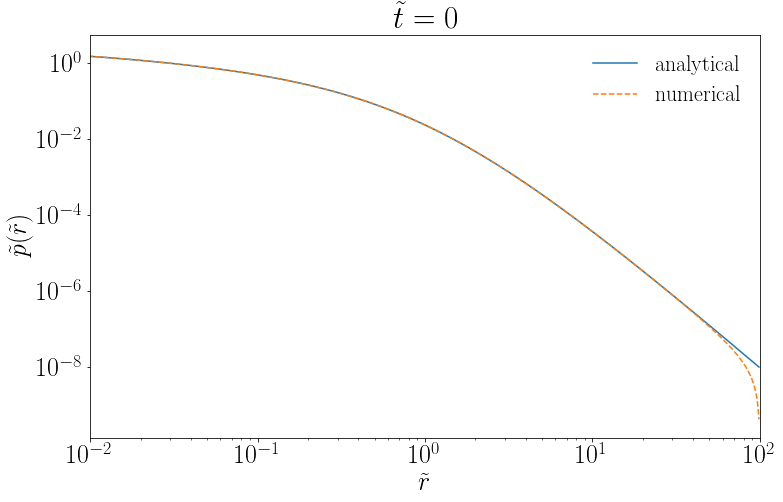

In [180]:
pl.figure(figsize=(12,12/goldenratio))
pl.plot(rmidpoints,pinivals,label='analytical')
pl.plot(rmidpoints,[pNFWnum(r) for r in rmidpoints],'--',label='numerical')
pl.xlim([rmin,rmax])
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\tilde{r}$',fontsize=fontsize)
pl.ylabel(r'$\tilde{p}(\tilde{r})$',fontsize=fontsize)
pl.legend(loc='upper right',edgecolor='white',fontsize=legendfontsize)
pl.title(r'$\tilde{t}=0$')
pl.show()
###Ok.

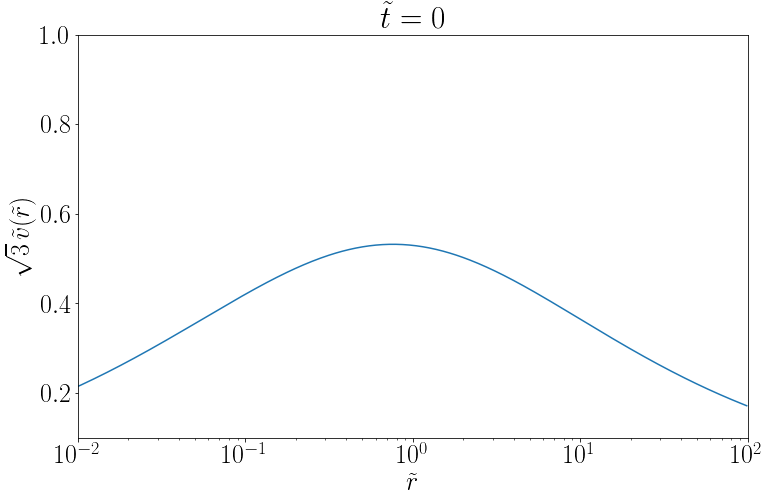

In [181]:
pl.figure(figsize=(12,12/goldenratio))
pl.plot(rmidpoints,np.sqrt(3)*vinivals)
pl.xlim([rmin,rmax])
pl.ylim([0.1,1.])
pl.xscale('log')
pl.xlabel(r'$\tilde{r}$',fontsize=fontsize)
pl.ylabel(r'$\sqrt{3}\,\tilde{v}(\tilde{r})$',fontsize=fontsize)
pl.title(r'$\tilde{t}=0$')
pl.show()
###Ok.

# Calculate luminosity L(ri)=Li (extensive variable)

In [186]:
def Lvals(vvals):
    test=np.array([(vinivals[i+1]+vinivals[i])/2 for i in range(0,len(vinivals)-1)]) #i=0,...,N-1=range(0,len(vinivals)-1)
    print(len(test))
    return test
    
print(Lvals(vinivals))    

399
[0.11040837 0.12486347 0.12586999 0.1268821  0.12789979 0.12892305
 0.12995184 0.13098615 0.13202597 0.13307126 0.134122   0.13517816
 0.13623972 0.13730666 0.13837893 0.13945651 0.14053937 0.14162748
 0.14272078 0.14381926 0.14492287 0.14603157 0.14714532 0.14826407
 0.14938778 0.15051641 0.15164991 0.15278822 0.1539313  0.15507908
 0.15623153 0.15738857 0.15855016 0.15971622 0.16088671 0.16206155
 0.16324067 0.16442402 0.16561152 0.1668031  0.16799868 0.16919819
 0.17040156 0.17160869 0.17281952 0.17403396 0.17525191 0.1764733
 0.17769804 0.17892602 0.18015716 0.18139136 0.18262852 0.18386854
 0.18511132 0.18635675 0.18760472 0.18885513 0.19010786 0.1913628
 0.19261983 0.19387883 0.19513968 0.19640226 0.19766644 0.1989321
 0.20019909 0.20146729 0.20273657 0.20400678 0.20527779 0.20654945
 0.20782162 0.20909415 0.21036689 0.21163969 0.2129124  0.21418485
 0.21545689 0.21672836 0.2179991  0.21926893 0.22053769 0.22180522
 0.22307132 0.22433584 0.22559859 0.2268594  0.22811808 0.229